In [1]:
# environment: ts

from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np

class cleanData:
    def __init__(self, data):
        self.origindata = data
        self.electdata = data.copy()

    def check_and_handle_zero_energy_values(self, energy_column_name):
        # Check if values in the energy column are equal to 0
        zero_energy_rows = self.electdata[self.electdata[energy_column_name] == 0]
        if zero_energy_rows.empty:
            print("Dataset doesnt contains zero value")
        else:
            print("Dataset contains zero value")
            # self.zero_dataframe = self.create_zero_energy_dataframe(energy_column_name)
            # self.delete_zero_energy_row(energy_column_name)
            self.electdata[energy_column_name].replace(0.0, np.nan, inplace=True)
            self.fill_0_energy_with_mean(energy_column_name)

    def check_and_handle_NaN_values_in_X (self, column_name):
        # Check if values in the energy column are equal to NaN
        nan_value_row = self.electdata[self.electdata[column_name] == np.nan]
        if nan_value_row.empty: print("Dataset doesnt contains NaN value")
        else:
            print("Column contains NaN value")
            self.fill_nan_with_mean(column_name)

    def fill_nan_with_mean(self, column_name):
        energy = self.electdata[column_name].values
        imputer = KNNImputer(missing_values=np.nan, n_neighbors=10)
        # imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        energy = imputer.fit_transform(energy.reshape(-1, 1))
        self.electdata[column_name] = energy

        return self.electdata

    def delete_zero_energy_row(self, energy_column_name):
        # Delete rows with zero energy
        self.electdata = self.electdata[self.electdata[energy_column_name] != 0]

    def print_zero_energy_row(self, energy_column_name):
        zero_energy_rows = self.electdata[self.electdata[energy_column_name] == 0]
        if not zero_energy_rows.empty:
            print("Rows with zero energy:")
            print(zero_energy_rows)

    def create_zero_energy_dataframe(self, energy_column_name):
        # Create a new DataFrame that stores zero values
        zero_energy_rows = self.electdata[self.electdata[energy_column_name] == 0]
        if not zero_energy_rows.empty:
            return zero_energy_rows.copy()

    def return_copy_of_handled_dataset(self):
        return self.electdata.copy()

    def fill_0_energy_with_mean(self, energy_column_name):
        energy = self.electdata[energy_column_name].values
        # imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        imputer = KNNImputer(missing_values=np.nan, n_neighbors=2)
        energy = imputer.fit_transform(energy.reshape(-1, 1))
        self.electdata[energy_column_name] = energy
        



In [2]:
def fill_0_energy_with_mean(electdata, energy_column_name):
    
    electdata[energy_column_name].replace(0, np.nan, inplace=True)
    energy = electdata[energy_column_name].values
    imputer = KNNImputer(missing_values=np.nan, n_neighbors=2)
    energy = imputer.fit_transform(energy.reshape(-1, 1))
    electdata[energy_column_name] = energy

    return electdata

len data:  11209
Total NaN values in energy: 0
Percentage of NaN values: 0.000%
NaN indices in column_name column: []


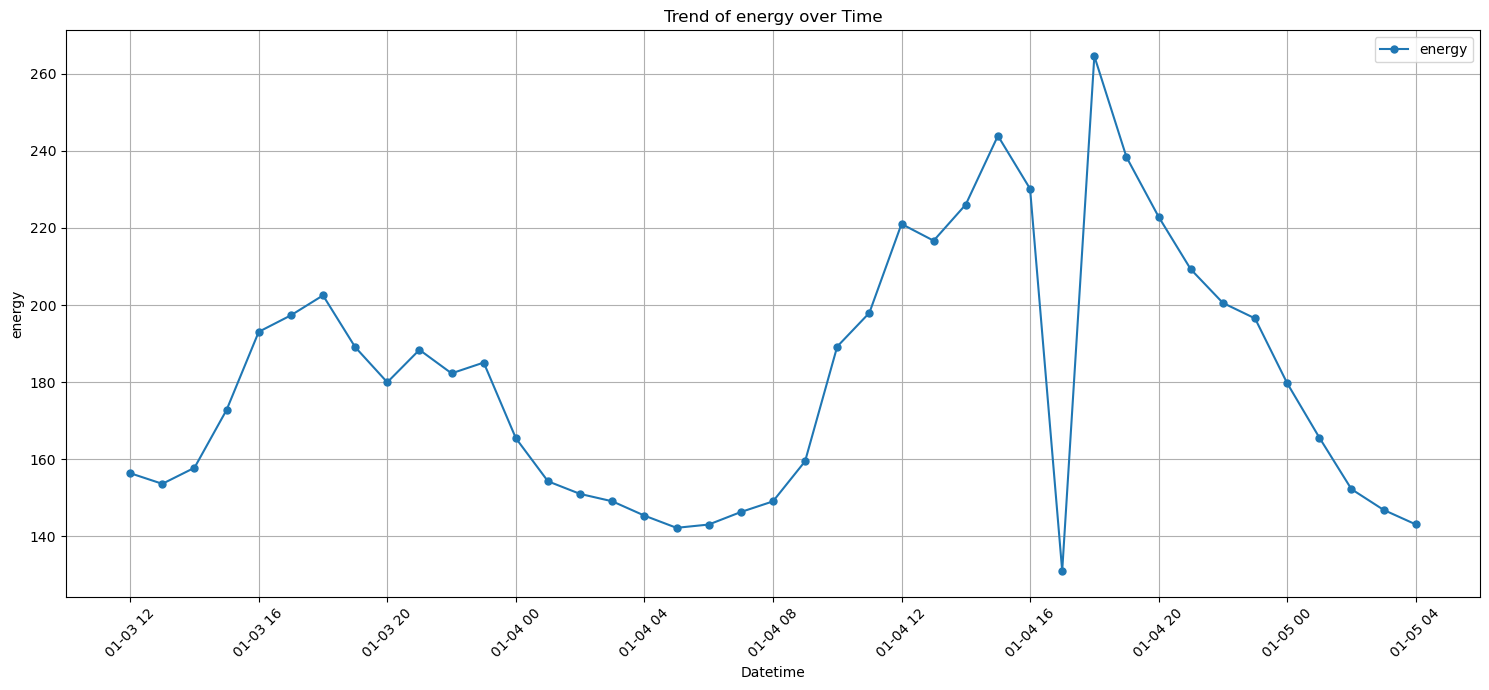

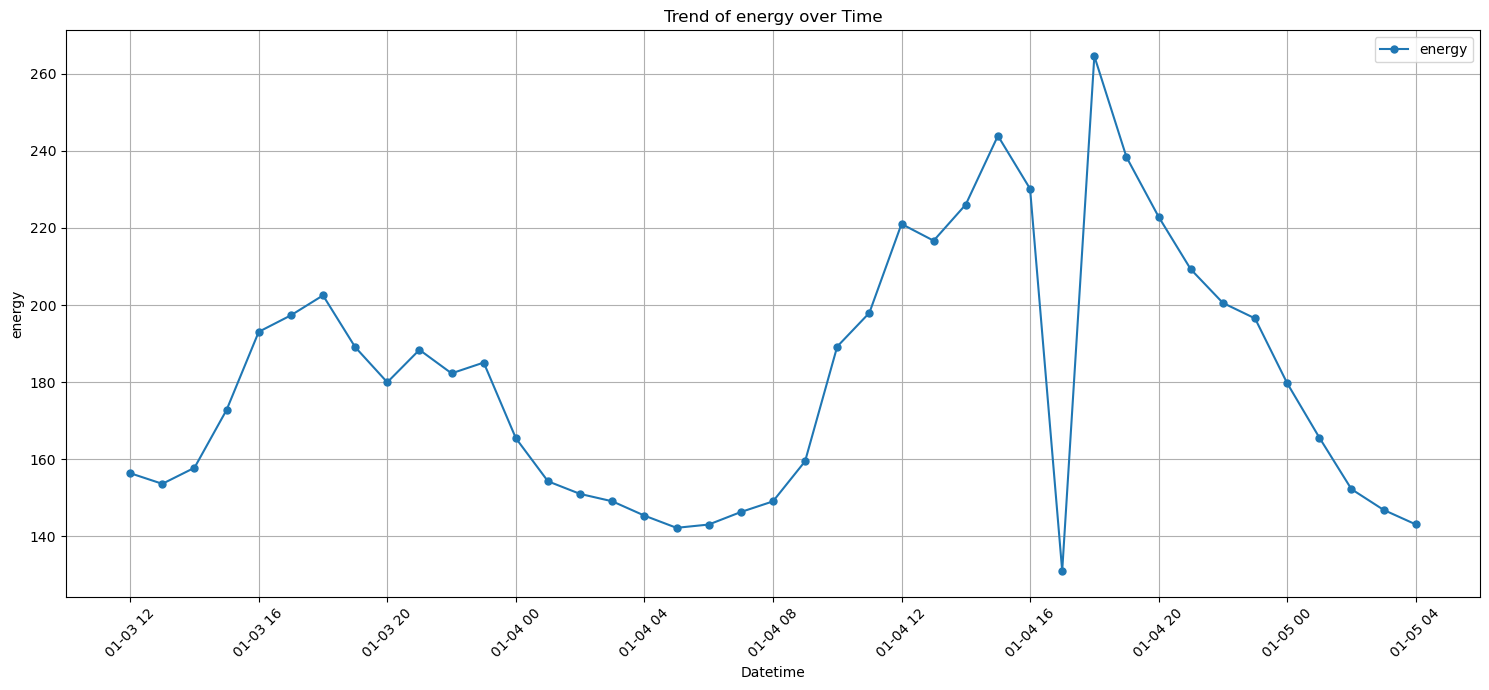

In [4]:
# environment: ts

import pandas as pd
import matplotlib.pyplot as plt

origindata = pd.read_csv("공대7호관_HV_02.csv")

def check_nan_values(data, column_name):
    # Calculate the total number of NaN values in the specified column
    total_nan_values = data[column_name].isna().sum()

    # Calculate the percentage of NaN values
    percentage_nan = (total_nan_values / len(data)) * 100

    # Get the indices of NaN values
    nan_indices = data[data[column_name].isna()].index.tolist()

    print(f"Total NaN values in {column_name}: {total_nan_values}")
    print(f"Percentage of NaN values: {percentage_nan:.3f}%")

    return percentage_nan, nan_indices

def plot_data_trend(data, column_name, datetime_column='date', index_range=None):
    # Ensure data[datetime_column] is in datetime format if it's specified and exists
    if datetime_column in data.columns and datetime_column:
        data[datetime_column] = pd.to_datetime(data[datetime_column])

    # If index_range is specified, filter the data accordingly using iloc for position-based indexing
    if index_range is not None:
        start, end = index_range
        filtered_data = data.iloc[start:end + 1]  # +1 to include the end index
    else:
        filtered_data = data

    # Plotting
    plt.figure(figsize=(15, 7))
    # Using datetime_column for the x-axis if specified, else default to DataFrame's index
    x_axis = filtered_data[datetime_column] if datetime_column in filtered_data.columns else filtered_data.index

    plt.plot(x_axis, filtered_data[column_name], label=column_name, marker='o', linestyle='-', markersize=5)
    plt.title(f"Trend of {column_name} over Time")
    plt.xlabel("Datetime" if datetime_column in filtered_data.columns else "Index")
    plt.ylabel(column_name)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)  # Optional: Adds a grid for better readability
 #   plt.show()


#######
# import dataProcessing

# checker = cleanData(origindata)
column_name = 'energy'
# checker.check_and_handle_zero_energy_values(column_name)
# processing_dataset = checker.return_copy_of_handled_dataset()

processing_dataset = fill_0_energy_with_mean(origindata, column_name)


processing_dataset['datetime'] = pd.to_datetime(processing_dataset['date'])
processing_dataset['day'] = processing_dataset['datetime'].dt.date

print ("len data: ",len(processing_dataset))
# Example usage of check_nan_values function
percentage_nan, nan_indices = check_nan_values(processing_dataset, column_name)
print(f"NaN indices in column_name column: {nan_indices}")


# plot_data_trend(origindata, 'temperatures(C)', datetime_column='date')
plot_data_trend(processing_dataset, column_name, datetime_column='date', index_range=(60, 100))
plot_data_trend(origindata, column_name, datetime_column='date', index_range=(60, 100))
plt.show()
